# *Optical Tweezers* | Lab-Session #0
## Jan-20-2021 13:45

This jupyter notebook is a used to collect and analyse data during today's lab session

In [2]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

In [3]:
# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
DATA = pd.read_csv(csvs[0])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array
DATA                            # Prints pretty PANDAS data frame

List of .csv files in .
	 0 : data.csv
	 1 : Jan-19-2021__21-43-13.csv


,Time,Space,Hi
0,1.0000,2.000,21321.2
1,3.1234,1234.000,-135.0
2,-123.4100,1545.534,-67.0


# Data Analysis

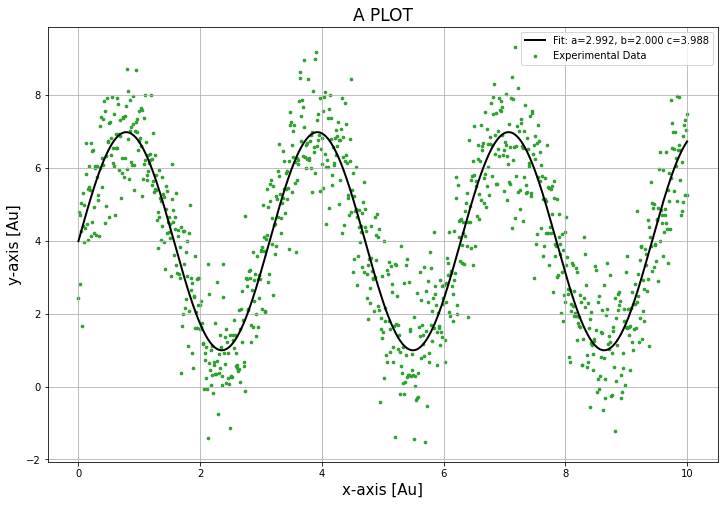

In [5]:
# Data fitting
# let's get some data x,y
Npts = 1000
x = np.linspace(0,10,Npts)
y = 3*np.sin(2*x) + 4 + np.random.normal(0,1,Npts)

# Example of trying to fit a function with 3 parameters 
def fit(x,a,b,c):
    return a*np.sin(b*x) + c

params, _ = curve_fit(fit,x,y,bounds=(0,(4,4,6)))

# Define the figure and plot parameters
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('A PLOT',fontsize=17)
ax.set_xlabel('x-axis [Au]',fontsize=15)
ax.set_ylabel('y-axis [Au]',fontsize=15)

# Plot the actual elements
ax.scatter(x,y,color = 'C2',s = 7, marker = 'o',label='Experimental Data')
ax.plot(x,fit(x,*params), color = 'black', lw = 2, label='Fit: a=%5.3f, b=%5.3f c=%5.3f'%tuple(params))

ax.legend(fontsize = 10)
ax.grid()